
# Project: Investigate The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 

>The movie database has been selected for this analysis where all the database of movie directors, tag_names, released_year, budget_adjustment, revenue_adjustment and other variables are discussed, we would be answering the questions: Which director and which Production company made the best income?


Import all necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("tmdb-movies.csv")



## Assess




In [3]:
df['id'].unique()

array([135397,  76341, 262500, ...,  39768,  21449,  22293], dtype=int64)

In [4]:
df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4582,127374,tt1930546,0.451287,0,0,Arthur Newman,Colin Firth|Emily Blunt|Anne Heche|David Andre...,http://arthur-newman.com/,Dante Ariola,"If you don't have a life, get someone else's.",...,A story of a man who fakes his own death and a...,101,Drama,Cross Creek Pictures|Vertebra Films,9/7/12,33,5.5,2012,0.000000e+00,0.0
9244,19236,tt0098253,0.355479,787000,0,Santa sangre,Axel Jodorowsky|Blanca Guerra|Guy Stockwell|Th...,NaN,Alejandro Jodorowsky,Forget Everything You Have Ever Seen.,...,A young man is confined in a mental hospital. ...,123,Fantasy|Horror|Mystery,Produzioni Intersound|Productora FÃ­lmica Real,5/1/89,25,5.5,1989,1.384321e+06,0.0
7190,9795,tt0407384,0.455263,0,0,Earthsea,Shawn Ashmore|Kristin Kreuk|Isabella Rossellin...,NaN,Robert Lieberman,Everyone must find their own magic,...,A reckless youth is destined to become the gre...,180,Adventure|Drama|Fantasy,NaN,12/13/04,18,6.1,2004,0.000000e+00,0.0
3184,16061,tt1183732,0.278220,0,0,æ±äº¬æ®‹é…·è­¦å¯Ÿ,Eihi Shiina|Itsuji Itao|Yukihide Benny|Jiji BÃ...,http://www.tokyogorepolice.com/,Yoshihiro Nishimura,Tokyo Is Burning,...,Set in a future-world vision of Tokyo where th...,110,Adventure|Horror|Action|Science Fiction,Fever Dreams|Nikkatsu,10/3/08,47,5.8,2008,0.000000e+00,0.0
10319,31642,tt0107096,0.381060,33000000,0,Heaven & Earth,Tommy Lee Jones|Robert John Burke|Timothy Carh...,NaN,Oliver Stone,An amazing true story of survival.,...,Le Ly lives in a small Vietnamese village whos...,140,History|War|Action|Drama,Regency Enterprises|Warner Bros.,12/24/93,28,6.5,1993,4.981251e+07,0.0


### The following is/are not consistent:
id : some are 6 digits, while others are 5 or 4 digits

<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### Assessing data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [45]:
df_null = df[df['director'].isnull()]

In [56]:
df_null['income_null'] = df_null['revenue_adjustment'] - df_null['budget_adjustment']

C:\Users\Ecowatt NG\AppData\Local\Temp\ipykernel_2892\2052736426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null['income_null'] = df_null['revenue_adjustment'] - df_null['budget_adjustment']


In [79]:
null_income = df_null['revenue_adjustment'] - df_null['budget_adjustment']

In [80]:
null_income.nlargest()

3276    6.907205e+06
532     0.000000e+00
548     0.000000e+00
556     0.000000e+00
1032    0.000000e+00
dtype: float64

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### To inspect using , the info, the sample the head function

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [84]:
df[df['production_companies'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 228 to 10853
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1030 non-null   int64  
 1   imdb_id               1025 non-null   object 
 2   popularity            1030 non-null   float64
 3   budget                1030 non-null   int64  
 4   revenue               1030 non-null   int64  
 5   original_title        1030 non-null   object 
 6   cast                  990 non-null    object 
 7   homepage              274 non-null    object 
 8   director              1007 non-null   object 
 9   tagline               383 non-null    object 
 10  keywords              667 non-null    object 
 11  overview              1027 non-null   object 
 12  runtime               1030 non-null   int64  
 13  genres                1016 non-null   object 
 14  production_companies  0 non-null      object 
 15  release_date      

In [8]:
df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2146,48392,tt1278449,0.442301,4466000,0,Sound of Noise,Bengt Nilsson|Sanna Persson|Magnus BÃ¶rjeson|M...,NaN,Johannes StjÃ¤rne Nilsson|Ola Simonsson,The first musical cop movie,...,A tone-deaf cop works to track down a group of...,102,Comedy,Film i VÃ¤st|Nordisk Film|Film i SkÃ¥ne|Bliss|...,12/25/10,29,7.2,2010,4.466000e+06,0.000000e+00
2078,66193,tt1130969,0.619551,0,3826,Sinners and Saints,Johnny Strong|Kevin Phillips|Costas Mandylor|S...,http://www.sinnersandsaintsthemovie.com,William Kaufman,His city. His rules. No prisoners.,...,"In lawless storm ravaged New Orleans, eleaguer...",104,Action|Thriller|Crime,Noir Blanc Films|Carolina Film Works|Throttle ...,9/14/10,16,5.3,2010,0.000000e+00,3.826000e+03
3341,8064,tt1132474,0.064319,0,0,Chiko,Denis Moschitto|Volkan Ã–zcan|Moritz Bleibtreu...,http://www.chiko-derfilm.de/,Ã–zgÃ¼r Yildirim,NaN,...,"This is the story of Isa, who grows up in a Ha...",92,Drama,CorazÃ³n International,2/9/08,16,6.3,2008,0.000000e+00,0.000000e+00
3518,72113,tt1692486,0.779648,25000000,27603069,Carnage,Kate Winslet|Jodie Foster|Christoph Waltz|John...,http://www.sonyclassics.com/carnage/site/index...,Roman Polanski,A new comedy of no manners,...,"In Brooklyn Bridge Park, eleven-year-old Zacha...",80,Comedy|Drama,Wild Bunch|Zanagar Films|Canal+|Constantin Fil...,9/16/11,382,6.9,2011,2.423495e+07,2.675836e+07
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07


In [9]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [11]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [12]:
df.duplicated().unique()

array([False,  True])




### Observation from the dataset
- There is a duplicate
- The following has missing data: cast, homepage, director, tagline, keywords, overview, genres, production_companies.
- The following Column names are not clear enough: budget_adj, revenue_adj
- The following dataset have wrong data type: popularity, genres, release_date
- There is a duplicate





### Measures of cleaning the dataset:
- Remove the duplicates
- Since we only have few missing values from the director column, it is advisable that the missing column be dropped
- Rename Column name to avoid confusion, rename budget_adj as budget_adjustment and revenue_adj as revenue_adjustment

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 
#### drop all incomplete data in the director column because the missing values are relatively small

#### Remove the duplicate using '.drop_duplicates()'

In [13]:
df = df.drop_duplicates()

#### To test if df is still duplicated

In [14]:
df.duplicated().unique()

array([False])

### Rename budget_adj and revenue_adj  using '.rename()' function

In [15]:
df.rename(columns = {'budget_adj' : 'budget_adjustment', 'revenue_adj' : 'revenue_adjustment'}, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

Drop Nan from director column because the Nan is relatively small and negligible

In [17]:
df[df['director'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 532 to 10426
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    44 non-null     int64  
 1   imdb_id               40 non-null     object 
 2   popularity            44 non-null     float64
 3   budget                44 non-null     int64  
 4   revenue               44 non-null     int64  
 5   original_title        44 non-null     object 
 6   cast                  38 non-null     object 
 7   homepage              10 non-null     object 
 8   director              0 non-null      object 
 9   tagline               10 non-null     object 
 10  keywords              16 non-null     object 
 11  overview              43 non-null     object 
 12  runtime               44 non-null     int64  
 13  genres                42 non-null     object 
 14  production_companies  21 non-null     object 
 15  release_date        

### It is obvious we cannot drop all the observations with Nan because the observations with complete data are significantly few compared to the whole dataset

#### To check the director has the missing data, I use the ".isnull().nunique()" method

In [18]:
df['director'].isnull().sum()

44

In [19]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adjustment,revenue_adjustment
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


#### To answer the question which director has highest income, we need to create a dataframe that has the director and the income

#### First find income by obtaining the difference between the revenue adjustment and budget adjustment. Then creating a column for the income.

In [20]:
# Creating the income series
df['income'] = df['revenue_adjustment'] - df['budget_adjustment']

#### Create a dataframe that is a subset to the big database which contains the director and the income as the column head.

In [21]:
df1 = df[['director', 'income']]

#### To get the rows with directors with NaN using df1[df1['director'].isnull()]

In [22]:
df1[df1['director'].isnull()]

,director,income
532,NaN,0.000000e+00
548,NaN,0.000000e+00
556,NaN,0.000000e+00
1032,NaN,0.000000e+00
1054,NaN,0.000000e+00
1203,NaN,-1.381637e+05
1241,NaN,0.000000e+00
1288,NaN,0.000000e+00
1852,NaN,0.000000e+00
1872,NaN,-3.303301e+06


#### Droping all the null values in the director column

In [23]:
df1 = df1.dropna()

In [24]:
df1[df1.isnull()].sum()

director      0
income      0.0
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1:
#### Which director has the highest income?

#### Since viewing the whole data could be to big to visualize, let us sort the df1 and then visualize the first 10

In [25]:
df1 = df1.sort_values(by = ['income'], ascending = False).head(10)

#### To view the df1 in bar chart use the function 'df1.plot.bar'

In [37]:
df1.income.isnull().unique()

array([False])

In [26]:
df1.describe()

,income
count,1.000000e+01
mean,1.953866e+09
std,4.594601e+08
min,1.376998e+09
25%,1.593357e+09
50%,1.823306e+09
75%,2.208044e+09
max,2.750137e+09


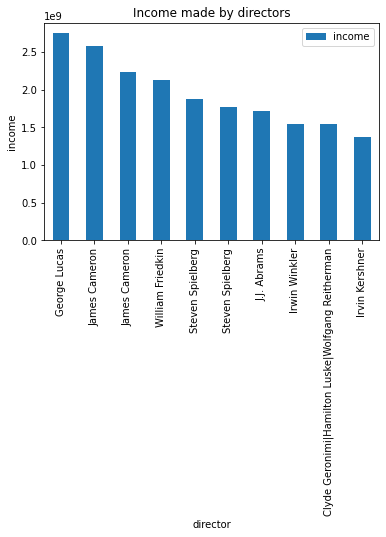

In [104]:
df1.plot(kind = 'bar', x = 'director', y = 'income', title = ('Income made by directors'));
plt.xlabel('director')
plt.ylabel('income')
plt.show()

#### To view the line graph using .plot.line()

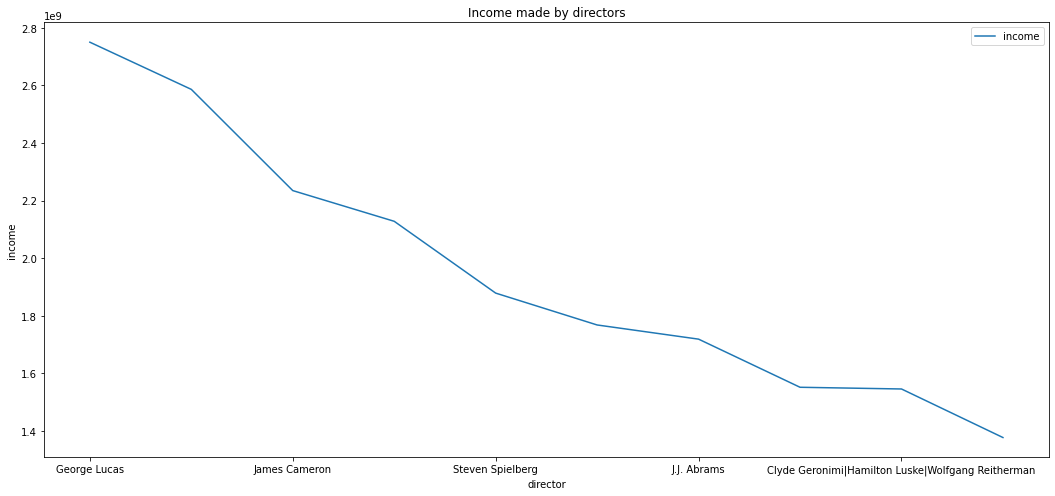

In [106]:
df1.plot.line(x = 'director', y = 'income', figsize = (18,8), title = ('Income made by directors'))
plt.xlabel('director')
plt.ylabel('income')
plt.show()

### Answer:
#### From the EDA above, we can say that George Lucas made the highest income

### Research Question 2  :
#### Which year do company has the best income?

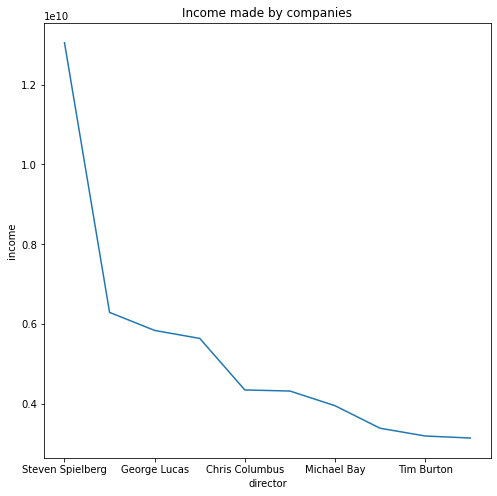

In [109]:
df.groupby('director').income.sum().nlargest(10).plot(figsize = (8,8), title = ('Income made by companies'))
plt.xlabel('director')
plt.ylabel('income')
plt.show()

#### To view the largest in a bar chart

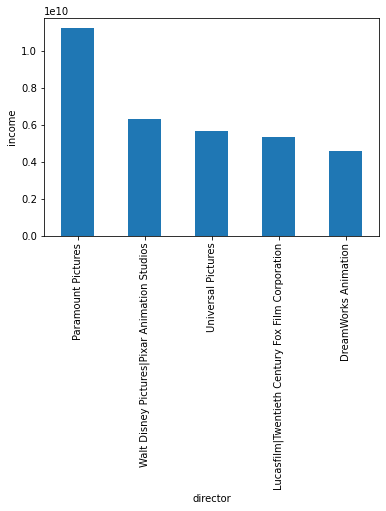

In [110]:
df.groupby('production_companies').income.sum().nlargest(5).plot.bar(y = 'income');
plt.xlabel('director')
plt.ylabel('income')
plt.show()

### Answer:
#### We can see from the analysis above that the Paramount Pictures has the best income

### Which year has the best income?

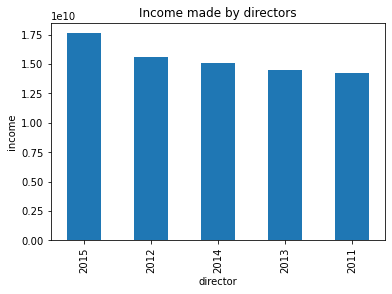

In [112]:
graph = df.groupby('release_year').income.sum().nlargest(5)
graph.head().plot.bar(title = ('Income made by directors'))
plt.xlabel('director')
plt.ylabel('income')
plt.show()

### Answer:

#### We can see that the highest income was in the year 2015.

# Conclusions

#### The limitations in this data include the following:
- The director, tagline, keywords, overview, runtime, genres and production_companies columns have some missing values and then seems very difficult to do the general analysis for them
- in In 80 an analysis was carried out to know the income made by directors whose names were missing and it was found that there income is not substantial as to affect our results so they dropping them would not affect the result of our analysis.
- Therefore in the real sense, this project does not have limitations from the director column however it is quite different with the production_company where we have relatively large number of missing value. Therefore, we can say that the result may not be totally accurate.